In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
!pip install gradio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
import gradio as gr

In [4]:
# Load the dataset
data_dir = '/kaggle/input/brain-tumor-classification-mri/Training'
categories = ['no_tumor', 'pituitary_tumor','glioma_tumor','meningioma_tumor']
#categories = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor' : 3}

In [5]:
data = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, class_num])
        except Exception as e:
            pass

In [6]:
# Create a Pandas dataframe from the data list
df = pd.DataFrame(data, columns=['Image', 'Target'])

In [7]:
df.shape

(2870, 2)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Image'], df['Target'], test_size=0.2, random_state=42)

In [9]:
# Flatten the image data and convert it to an array
X_train = np.array([i.flatten() for i in X_train])
X_test = np.array([i.flatten() for i in X_test])

**Logistic Regression**

In [10]:
'''from sklearn.linear_model import LogisticRegression
# Define the Logistic Regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the accuracy and the confusion matrix of the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)
#Accuracy: 0.7857142857142857'''

'from sklearn.linear_model import LogisticRegression\n# Define the Logistic Regression model\nmodel_lr = LogisticRegression()\n\n# Train the model\nmodel_lr.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = model_lr.predict(X_test)\n\n# Evaluate the accuracy and the confusion matrix of the model\naccuracy = accuracy_score(y_test, y_pred)\ncm = confusion_matrix(y_test, y_pred)\n\nprint("Accuracy:", accuracy)\nprint("Confusion matrix:\n", cm)\n#Accuracy: 0.7857142857142857'

In [11]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)
pca_train = X_train
pca_test = X_test

In [12]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.2, max_iter=1000)
lg.fit(pca_train, y_train)

LogisticRegression(C=0.2, max_iter=1000)

In [13]:
print("Training Score: ", lg.score(pca_train, y_train))
print("testing Score: ", lg.score(pca_test, y_test))

Training Score:  1.0
testing Score:  0.8066202090592335


**XGBoost**

Without PCA

In [14]:
import xgboost as xgb
xgb_m = xgb.XGBClassifier(random_state=42)
xgb_m.fit(X_train, y_train)
# Make predictions on the test set
y_pred = xgb_m.predict(X_test)

In [15]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8989547038327527


In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 66   0   0  12]
 [  0 175   3   2]
 [  0   0 145  17]
 [  9   7   8 130]]


<AxesSubplot:>

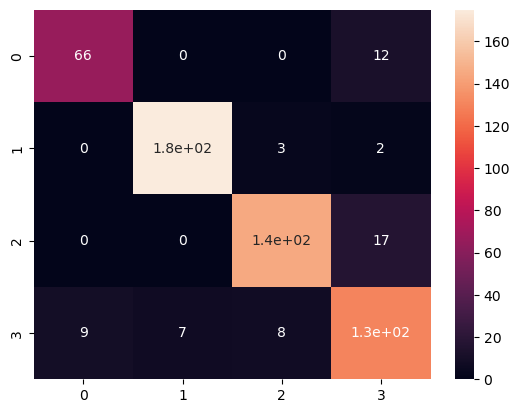

In [17]:
sns.heatmap(cm, annot=True)

With PCA

In [18]:
xgb_model = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100)
xgb_model.fit(pca_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [19]:
print("Training Score: ", xgb_model.score(pca_train, y_train))
print("testing Score: ", xgb_model.score(pca_test, y_test))

Training Score:  1.0
testing Score:  0.8902439024390244


<AxesSubplot:>

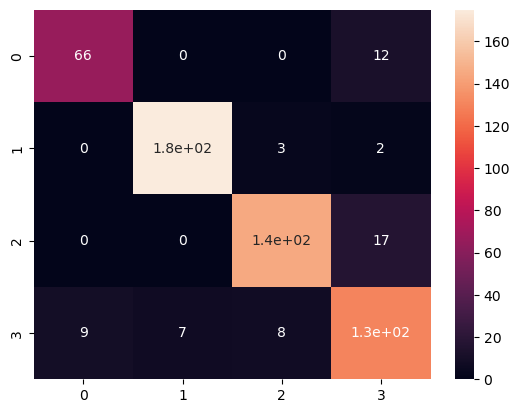

In [20]:
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True)

**SVM**

Without PCA

In [21]:
# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [22]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.837979094076655


<AxesSubplot:>

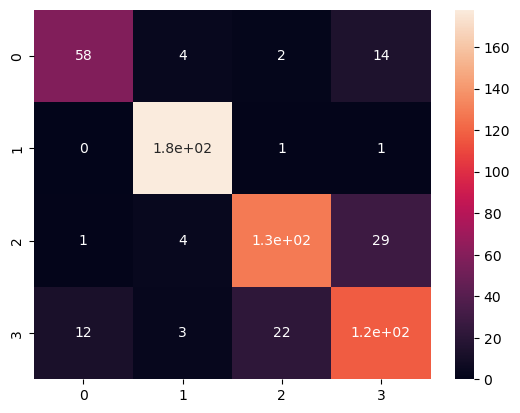

In [23]:
cm_model = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_model, annot=True)

With PCA

In [24]:
sv = SVC(C=4.5, kernel='rbf')
sv.fit(pca_train, y_train)
print("Training Score: ", sv.score(pca_train, y_train))
print("testing Score: ", sv.score(pca_test, y_test))

Training Score:  0.9965156794425087
testing Score:  0.8937282229965157


<AxesSubplot:>

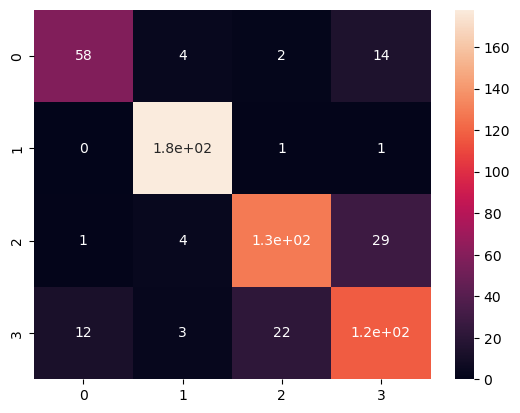

In [25]:
cm_sv = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_sv, annot=True)

**Comparision of Models**

In [26]:
from tabulate import tabulate

headers = ['Model', 'Accuracy']
data =  [['Logistic Regression (Testing Score)', lg.score(X_test, y_test)],
        ['SVM (Testing Score)', sv.score(X_test, y_test)],
        ['XGBoost (Testing Score)', xgb_m.score(X_test, y_test)]]

print(tabulate(data, headers=headers))

Model                                  Accuracy
-----------------------------------  ----------
Logistic Regression (Testing Score)    0.80662
SVM (Testing Score)                    0.893728
XGBoost (Testing Score)                0.898955


In [31]:
# Define a function to classify brain tumor images
def predict_brain_tumor_image(image):
    # Read the input image, resize it, and convert it to grayscale
    img_arr = cv2.cvtColor(cv2.resize(image, (100, 100)), cv2.COLOR_RGB2GRAY)
    # Flatten the image data and convert it to an array
    img_arr = np.array(img_arr.flatten()).reshape(1, -1)
    # Make a prediction using the trained SVM model
    prediction = xgb_m.predict(img_arr)
    return "The image is classified as " + categories[prediction[0]]

In [28]:
# Deploy the model using Gradio
input_interface = gr.inputs.Image(shape=(100, 100))
output_interface = gr.outputs.Textbox(label="Classification")

gr.Interface(fn=predict_brain_tumor_image, inputs=input_interface, outputs=output_interface, title="Brain Tumor Classification", description="Upload an image to classify whether it is a TUMOR or NON-TUMOR.").launch()

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:23: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",


Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://719be072fb06294d4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
